### Comparaison des clustering de pixels par KMEANS et Felzenszwalb-Huttenlocher graph-based segmentation

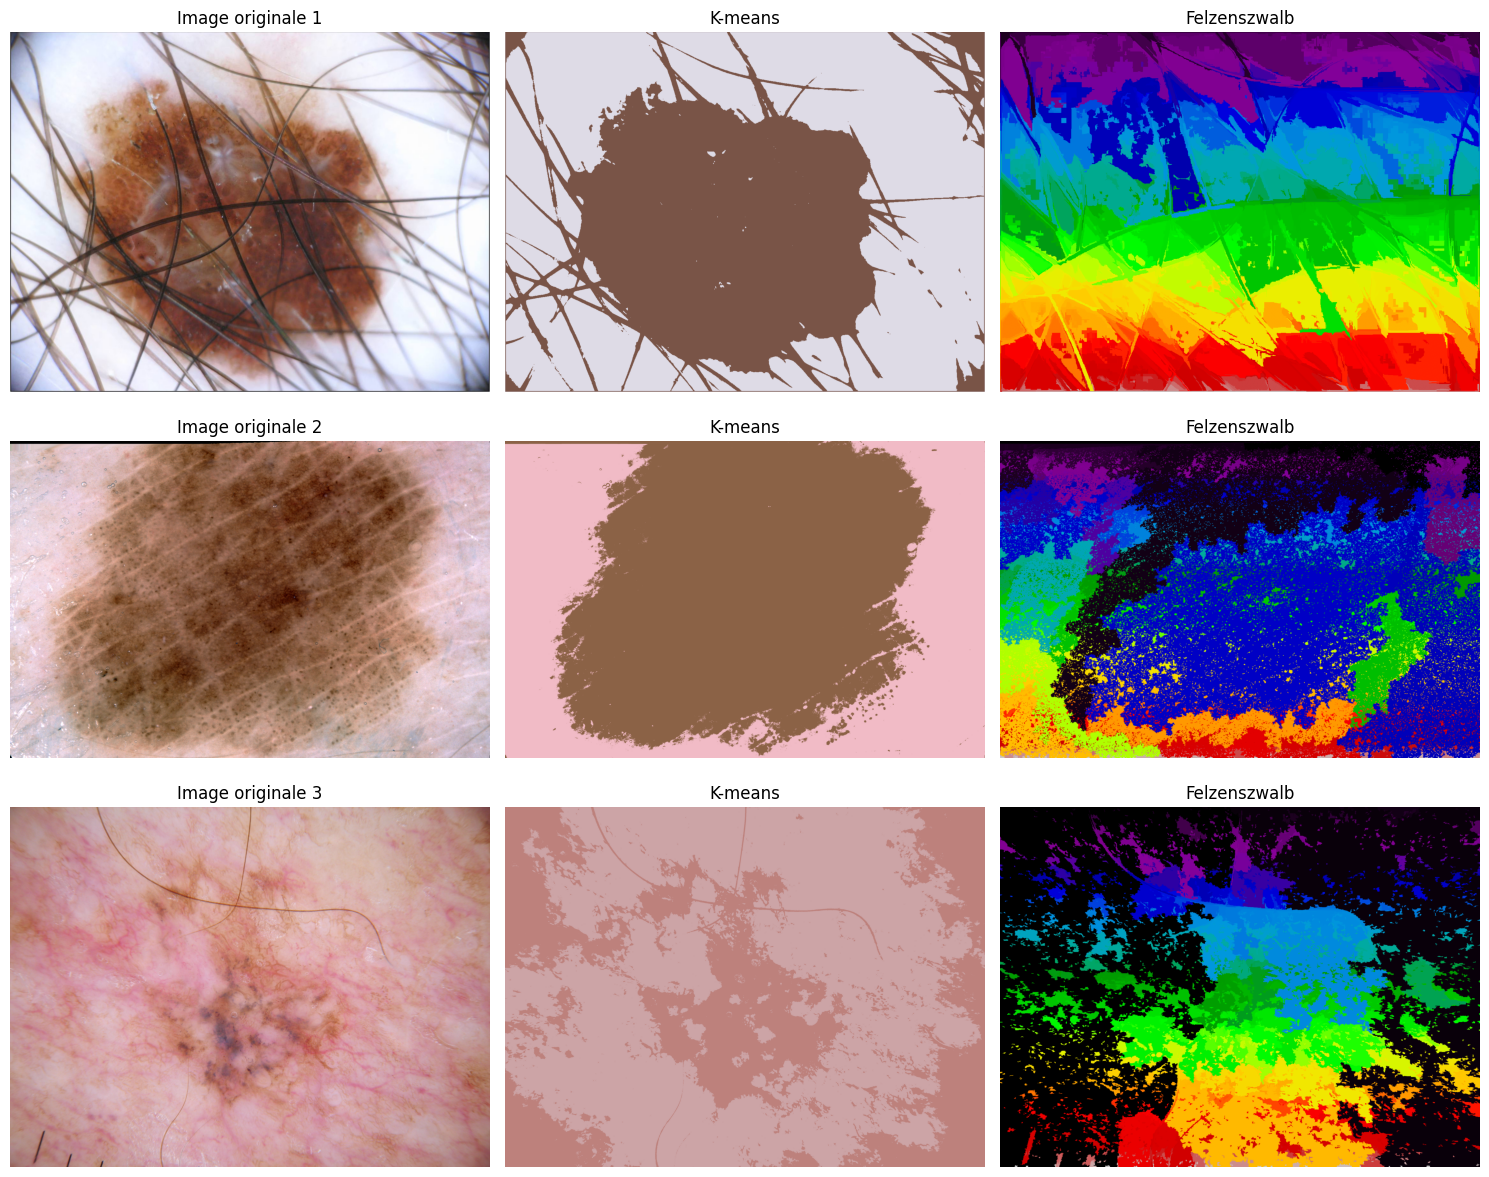

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from skimage.segmentation import felzenszwalb
from skimage.io import imread

base_path = "/Users/leo-paul/.cache/kagglehub/datasets/wanderdust/skin-lesion-analysis-toward-melanoma-detection/versions/1/skin-lesions/train/melanoma/"

random_imgs = random.sample(os.listdir(base_path), 3)

plt.figure(figsize=(15, 12))

for idx, img_name in enumerate(random_imgs):
    img_path = os.path.join(base_path, img_name)

    image = cv2.imread(img_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    pixel_vals = image_rgb.reshape((-1, 3))
    pixel_vals = np.float32(pixel_vals)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    k = 2
    _, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    segmented_data = centers[labels.flatten()]
    segmented_kmeans = segmented_data.reshape(image_rgb.shape)

    segments_felzen = felzenszwalb(image_rgb, scale=100, sigma=0.5, min_size=50)

    plt.subplot(3, 3, idx*3 + 1)
    plt.imshow(image_rgb)
    plt.title(f"Image originale {idx+1}")
    plt.axis("off")

    plt.subplot(3, 3, idx*3 + 2)
    plt.imshow(segmented_kmeans)
    plt.title("K-means")
    plt.axis("off")

    plt.subplot(3, 3, idx*3 + 3)
    plt.imshow(segments_felzen, cmap='nipy_spectral')
    plt.title("Felzenszwalb")
    plt.axis("off")

plt.tight_layout()
plt.show()

## Sans parler des coûts computationnels, Kmeans semble plus adapté à notre cas d'usage